Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Get the datasets

In [ ]:
#loanthemedataset
loan_theme_ids = pd.read_csv('/content/loan_theme_ids.csv')
#loan_themes_by_region
loan_themes_by_region = pd.read_csv('/content/loan_themes_by_region.csv')
#kiva_loans
kiva_loans = pd.read_csv('/content/kiva_loans.csv')
#kiva_mpi_region_locations
kiva_mpi_region_locations = pd.read_csv('/content/kiva_mpi_region_locations.csv')

Lets have an overview of our data

In [ ]:
#check first 5 rows of loan_theme_ids
loan_theme_ids.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [ ]:
#check first 5 rows of loan_themes_by_region
loan_themes_by_region.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [ ]:
#check first 5 rows of kiva_loans
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12.0,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14.0,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6.0,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8.0,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16.0,NaN,female,monthly,2014-01-01


In [ ]:
#check first 5 rows of kiva_mpi_region_locations
kiva_mpi_region_locations.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


Lets check the description of our datasets

In [ ]:
#loan_theme_ids description
loan_theme_ids.describe()

,id,Partner ID
count,7.790920e+05,764279.000000
mean,1.047475e+06,180.825840
std,2.282538e+05,97.914029
min,6.386310e+05,9.000000
25%,8.499768e+05,126.000000
50%,1.046528e+06,145.000000
75%,1.244768e+06,204.000000
max,1.444243e+06,557.000000


In [ ]:
#loan_themes_by_region decription
loan_themes_by_region.describe()

,Partner ID,number,amount,lat,lon,rural_pct
count,15736.000000,15736.000000,1.573600e+04,13662.000000,13662.000000,14344.000000
mean,191.376144,53.628432,2.003991e+04,14.328878,29.433569,68.084635
std,118.705003,403.079799,9.636941e+04,16.757689,83.255739,26.550064
min,9.000000,1.000000,2.500000e+01,-34.610548,-172.790661,0.000000
25%,123.000000,1.000000,9.500000e+02,6.266728,-71.967463,60.000000
50%,154.000000,4.000000,2.600000e+03,13.484101,41.899993,73.000000
75%,217.000000,15.000000,8.750000e+03,22.189940,106.677321,85.000000
max,545.000000,22538.000000,4.929900e+06,51.314017,159.972900,100.000000


In [ ]:
#kiva_loans descption
kiva_loans.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,1.303320e+05,130332.000000,130332.000000,126215.000000,130331.000000,130331.000000
mean,7.283638e+05,852.783814,884.874014,158.468692,14.338753,24.378053
std,7.348015e+04,1135.579285,1168.242114,70.427060,9.973726,31.592039
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,6.859668e+05,275.000000,300.000000,120.000000,8.000000,9.000000
50%,7.187915e+05,500.000000,500.000000,145.000000,13.000000,15.000000
75%,7.517812e+05,1000.000000,1025.000000,199.000000,14.000000,29.000000
max,1.084282e+06,100000.000000,100000.000000,431.000000,148.000000,2986.000000


In [ ]:
#kiva_mpi_region_locations description
kiva_mpi_region_locations.describe()

,MPI,lat,lon
count,984.000000,892.000000,892.000000
mean,0.211330,9.169710,16.635888
std,0.183621,16.484531,61.234566
min,0.000000,-34.947896,-122.747131
25%,0.053000,-1.027901,-12.819854
50%,0.155000,11.211379,26.419389
75%,0.341500,18.084292,47.019436
max,0.744000,49.264748,138.581284


Lets check the infomation of our datasets

In [ ]:
#loanthemedataset info
loan_theme_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779092 entries, 0 to 779091
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               779092 non-null  int64  
 1   Loan Theme ID    764279 non-null  object 
 2   Loan Theme Type  764279 non-null  object 
 3   Partner ID       764279 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.8+ MB


In [ ]:
#loan_themes_by_region info
loan_themes_by_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15736 entries, 0 to 15735
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Partner ID          15736 non-null  int64  
 1   Field Partner Name  15736 non-null  object 
 2   sector              15736 non-null  object 
 3   Loan Theme ID       15736 non-null  object 
 4   Loan Theme Type     15736 non-null  object 
 5   country             15736 non-null  object 
 6   forkiva             15736 non-null  object 
 7   region              15736 non-null  object 
 8   geocode_old         1200 non-null   object 
 9   ISO                 15722 non-null  object 
 10  number              15736 non-null  int64  
 11  amount              15736 non-null  int64  
 12  LocationName        15736 non-null  object 
 13  geocode             13662 non-null  object 
 14  names               13661 non-null  object 
 15  geo                 15736 non-null  object 
 16  lat 

In [ ]:
#kiva_loans info
kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130332 entries, 0 to 130331
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  130332 non-null  int64  
 1   funded_amount       130332 non-null  float64
 2   loan_amount         130332 non-null  float64
 3   activity            130332 non-null  object 
 4   sector              130332 non-null  object 
 5   use                 128475 non-null  object 
 6   country_code        130332 non-null  object 
 7   country             130332 non-null  object 
 8   region              113835 non-null  object 
 9   currency            130331 non-null  object 
 10  partner_id          126215 non-null  float64
 11  posted_time         130331 non-null  object 
 12  disbursed_time      130154 non-null  object 
 13  funded_time         123992 non-null  object 
 14  term_in_months      130331 non-null  float64
 15  lender_count        130331 non-nul

In [ ]:
#kiva_mpi_region_locations info
kiva_mpi_region_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


Data Preparation and cleaning

This will include:
*   Missing values
*   Duplicates
*   Outliers




Lets us first check for null values

id                     0
Loan Theme ID      14813
Loan Theme Type    14813
Partner ID         14813
dtype: int64


<Axes: >

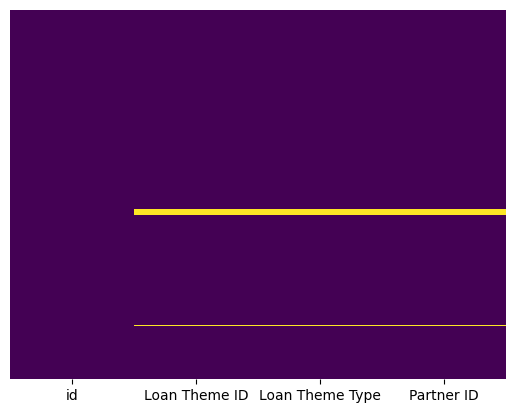

In [ ]:
#loanthemedataset
print(loan_theme_ids.isnull().sum())

sns.heatmap(loan_theme_ids.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Partner ID                0
Field Partner Name        0
sector                    0
Loan Theme ID             0
Loan Theme Type           0
country                   0
forkiva                   0
region                    0
geocode_old           14536
ISO                      14
number                    0
amount                    0
LocationName              0
geocode                2074
names                  2075
geo                       0
lat                    2074
lon                    2074
mpi_region               14
mpi_geo                6065
rural_pct              1392
dtype: int64


<Axes: >

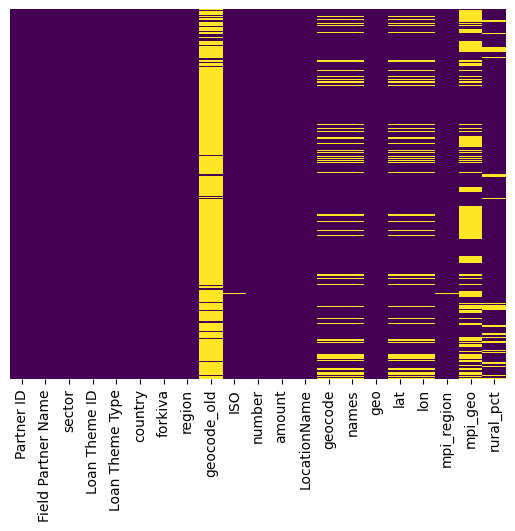

In [ ]:
#loan_themes_by_region
print(loan_themes_by_region.isnull().sum())

sns.heatmap(loan_themes_by_region.isnull(), yticklabels=False, cbar=False, cmap='viridis')

id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                    1857
country_code              0
country                   0
region                16497
currency                  1
partner_id             4117
posted_time               1
disbursed_time          178
funded_time            6340
term_in_months            1
lender_count              1
tags                  56686
borrower_genders       1856
repayment_interval        1
date                      1
dtype: int64


<Axes: >

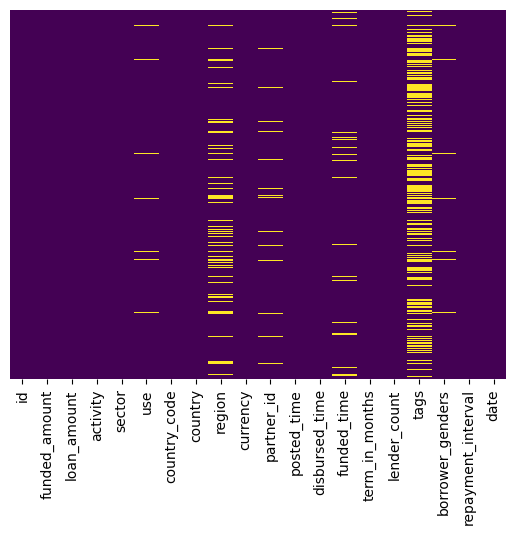

In [ ]:
#kiva_loans
print(kiva_loans.isnull().sum())

sns.heatmap(kiva_loans.isnull(), yticklabels=False, cbar=False, cmap='viridis')

LocationName    1788
ISO             1764
country         1764
region          1788
world_region    1764
MPI             1788
geo                0
lat             1880
lon             1880
dtype: int64


<Axes: >

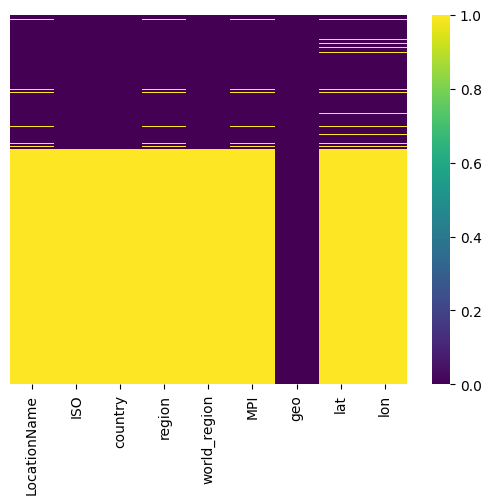

In [ ]:
#kiva_mpi_region_locations
print(kiva_mpi_region_locations.isnull().sum())

sns.heatmap(kiva_mpi_region_locations.isnull(), yticklabels=False, cmap='viridis')

We have missing values, we will deal with thm later on, now lets check for duplicates

In [ ]:
#loanthemedataset
print('loan_theme_ids duplicates are', loan_theme_ids.duplicated().sum())
print('loan_themes_by_region duplicates are',loan_themes_by_region.duplicated().sum())
print('kiva_loans duplicates are',kiva_loans.duplicated().sum())
print('kiva_mpi_region_locations duplicates are',kiva_mpi_region_locations.duplicated().sum())

loan_theme_ids duplicates are 0
loan_themes_by_region duplicates are 0
kiva_loans duplicates are 0
kiva_mpi_region_locations duplicates are 1763


**Question 1 : Define 2-3 metrics that can be generated using the existing datasets. Explain why you've chosen each metric and the pros and cons of their usage**

One of the metrics that we can generate from our data is:



1.   Average lender contribution - This will be the average amount contributed by each lender 'funded_amount' divided by 'lender_count'



In [ ]:
kiva_loans['average_lender_contribution'] = kiva_loans['funded_amount'] / kiva_loans['lender_count']

From our histogram we can tell that the chart is  right-skewed distribution, indicating that the majority of lenders contribute a small amount, while a few lenders contribute significantly larger sums. This is evident from the tall bar on the left representing contributions in the range of 0-1000, with the frequency rapidly decreasing as the contribution amount increases

2.Loan distribution by sector - The distribution of loans across different sectors, by total funded_amount

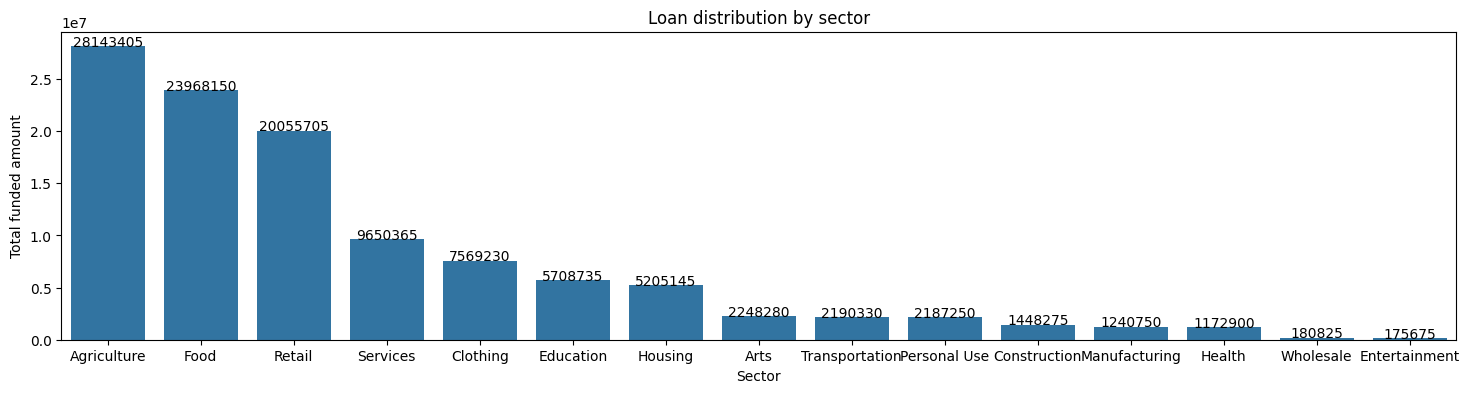

In [ ]:
loan_by_sector = kiva_loans.groupby('sector')['funded_amount'].sum().sort_values(ascending = False)

from operator import index

plt.figure(figsize = (18,4))
sns.barplot(x = loan_by_sector.index, y = loan_by_sector.values)

plt.xlabel('Sector')
plt.ylabel('Total funded amount')
plt.title('Loan distribution by sector')

for i in range(len(loan_by_sector.index)):
  plt.text(i, loan_by_sector.values[i], f'{round(loan_by_sector.values[i])}', ha = 'center')

The bar chart illustrates the distribution of funding across different sectors on the platform. Agriculture is the leading sector in terms of funding, followed by Food and Retail. Funding gradually tapers off for sectors like Services, Clothing, Education, and others.

3.Borrower Gender Distribution -The distribution of loans awarded to borrowers who are men as opposed to women

<ipython-input-22-917254d8e3c0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='borrower_gender', y='percentage', data=gender_distribution, palette='coolwarm')


Text(0, 0.5, 'Percentage (%)')

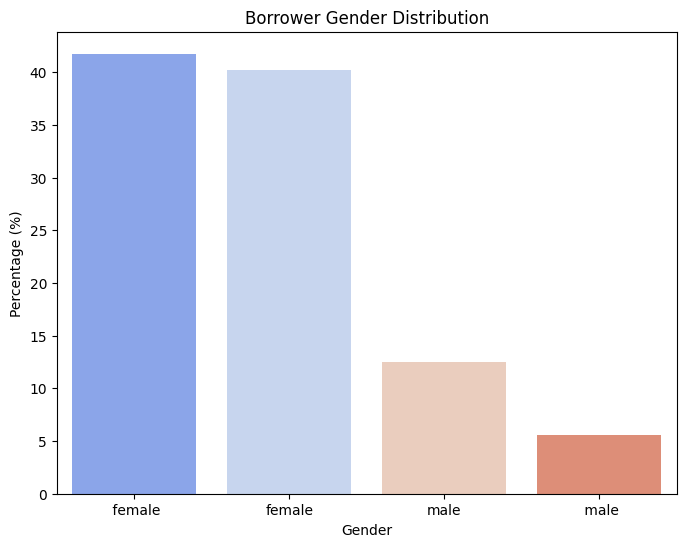

In [ ]:
gender_split_df = kiva_loans['borrower_genders'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
gender_split_df.name = 'borrower_gender'

# Step 1: Calculate the distribution of genders
gender_distribution = gender_split_df.value_counts(normalize=True).reset_index()
gender_distribution.columns = ['borrower_gender', 'percentage']
gender_distribution['percentage'] *= 100  # Convert to percentage

# Step 2: Plot the Borrower Gender Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x='borrower_gender', y='percentage', data=gender_distribution, palette='coolwarm')
plt.title('Borrower Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')

#Question 2: Let us have a deep analysis on the Average lender contribution

In [ ]:
#lets check the first 5 rows of the metric we created next to the funded_amount and 'lender_count'
kiva_loans[['average_lender_contribution', 'funded_amount','lender_count']].head()

,average_lender_contribution,funded_amount,lender_count
0,25.000000,300.0,12.0
1,41.071429,575.0,14.0
2,25.000000,150.0,6.0
3,25.000000,200.0,8.0
4,25.000000,400.0,16.0


Text(0.5, 1.0, 'Distribution on average lender contribtion')

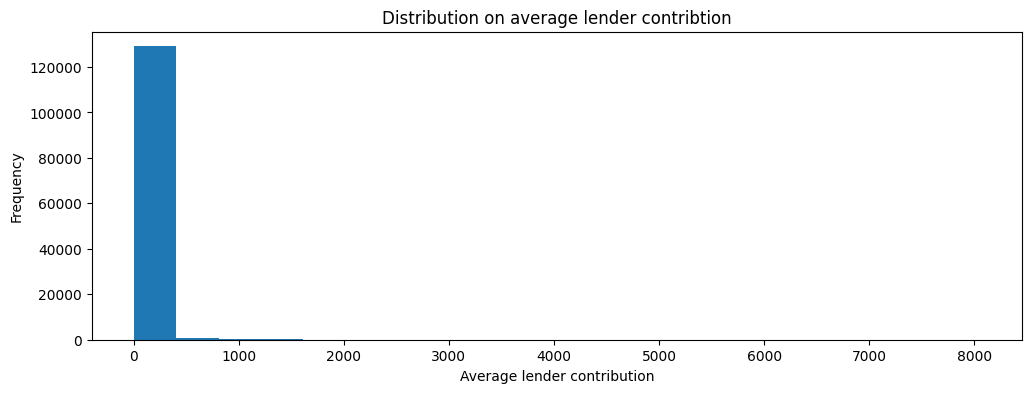

In [ ]:
#lets check the distribution of the metric

plt.figure(figsize = (12,4))
plt.hist(kiva_loans['average_lender_contribution'], bins = 20)

plt.xlabel('Average lender contribution')
plt.ylabel('Frequency')
plt.title('Distribution on average lender contribtion')

Average Lender Contribution by Sector

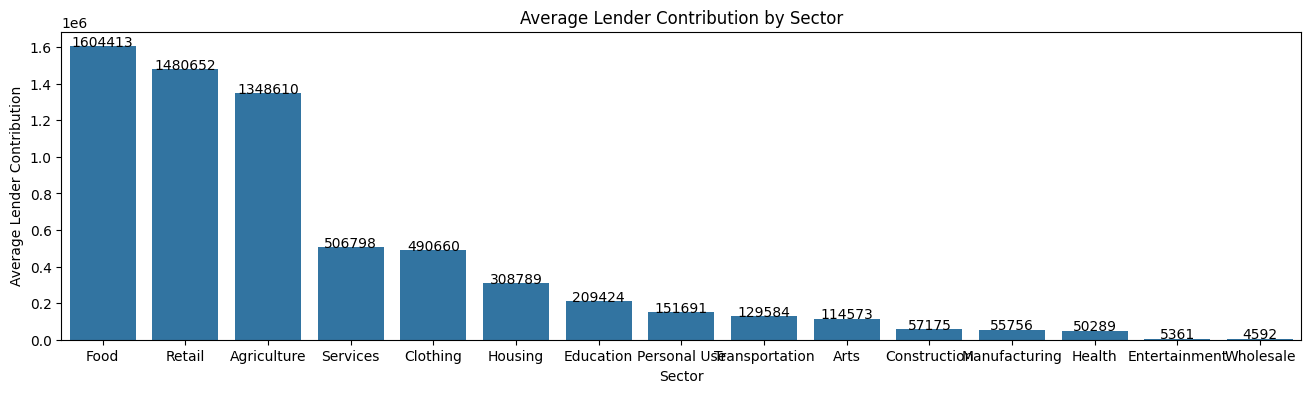

In [ ]:
#Average Lender Contribution by Sector

average_lender_contribution_sector = kiva_loans.groupby('sector')['average_lender_contribution'].sum().sort_values(ascending = False)

plt.figure(figsize = (16,4))
sns.barplot(x = average_lender_contribution_sector.index, y = average_lender_contribution_sector.values)

plt.xlabel('Sector')
plt.ylabel('Average Lender Contribution')
plt.title('Average Lender Contribution by Sector')

#annotate the bars
for i in range(len(average_lender_contribution_sector.index)):
  plt.text(i, average_lender_contribution_sector.values[i], f'{round(average_lender_contribution_sector.values[i])}', ha = 'center')

Correlation on Loan Amount by average_lender_contribution

Text(0, 0.5, 'Average Lender Contribution')

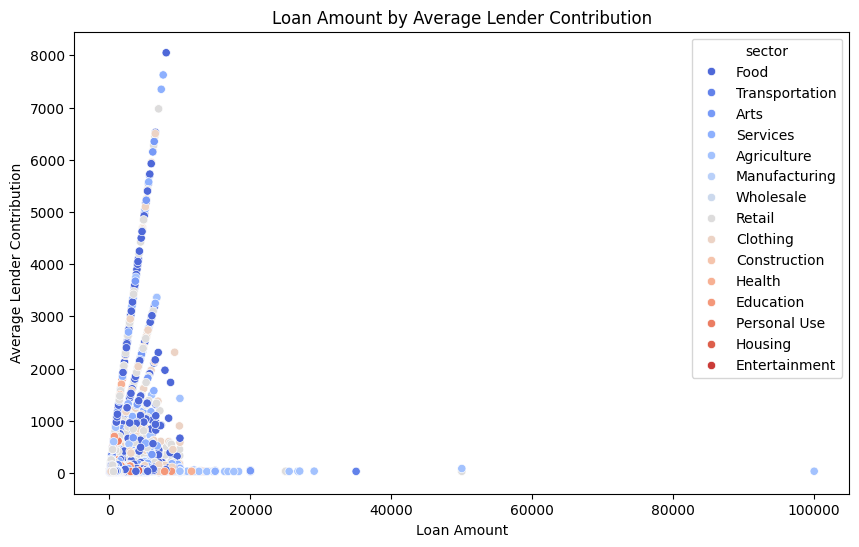

In [ ]:
#Correlation with Loan Amount

plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amount', y='average_lender_contribution', data=kiva_loans, hue='sector', palette='coolwarm')
plt.title('Loan Amount by Average Lender Contribution')
plt.xlabel('Loan Amount')
plt.ylabel('Average Lender Contribution')

Geographic Analysis by average_lender_contribution

<ipython-input-27-3e7548ca35a5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_contribution.index, y=country_contribution.values, palette='magma')


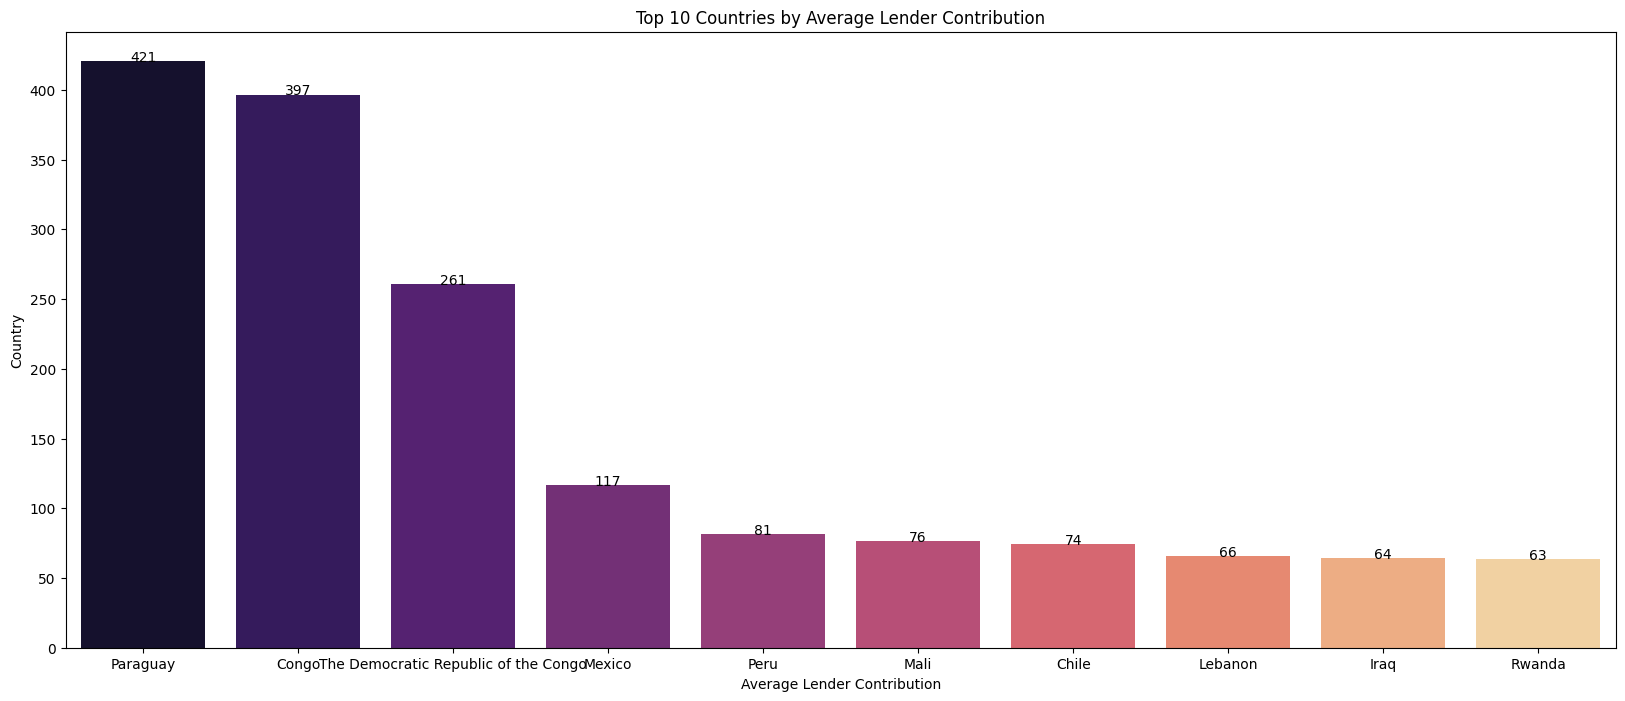

In [ ]:
#Geographic Analysis
country_contribution = kiva_loans.groupby('country')['average_lender_contribution'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(20, 8))
sns.barplot(x=country_contribution.index, y=country_contribution.values, palette='magma')
plt.title('Top 10 Countries by Average Lender Contribution')
plt.xlabel('Average Lender Contribution')
plt.ylabel('Country')

#annotate the bars
for i in range(len(country_contribution.index)):
  plt.text(i, country_contribution.values[i], f'{round(country_contribution.values[i])}', ha = 'center')